In [1]:
import cv2

In [2]:
img_folder = r'C:\Users\darak\OneDrive\Documents\Python Scripts\Impractical_Python_Projects-master\Impractical_Python_Projects-master\Chapter_15\video_frames'

In [3]:
import os

In [21]:
img_file = os.path.join(img_folder, 'MVI_6450 030.jpg')

In [22]:
print(img_file)

C:\Users\darak\OneDrive\Documents\Python Scripts\Impractical_Python_Projects-master\Impractical_Python_Projects-master\Chapter_15\video_frames\MVI_6450 030.jpg


In [23]:
image = cv2.imread(img_file)

In [24]:
from matplotlib import pyplot as plt

In [25]:
os.path.isfile(img_file)

True

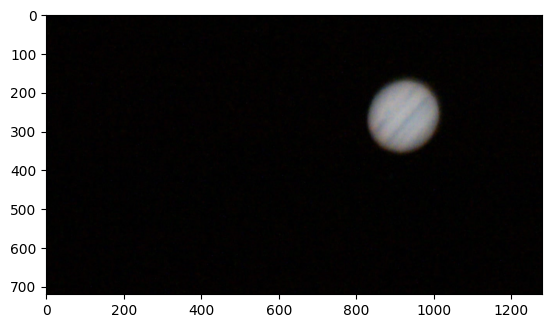

In [28]:
plt.imshow(image)
plt.show()

In [29]:
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


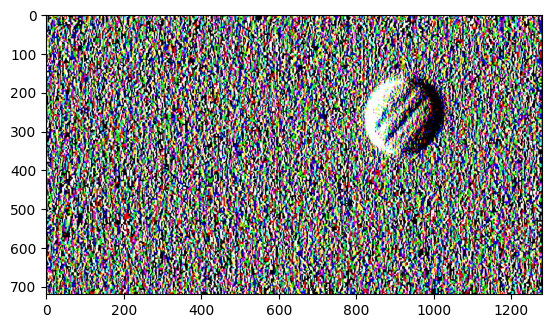

In [31]:
plt.imshow(sobelx)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


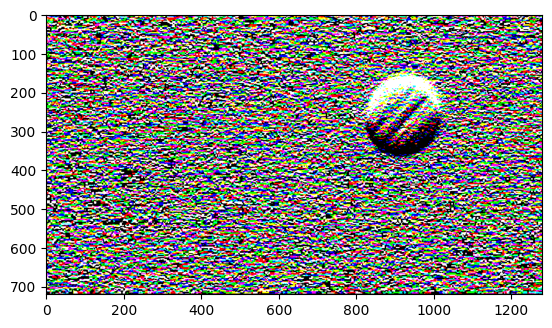

In [32]:
plt.imshow(sobely)
plt.show()

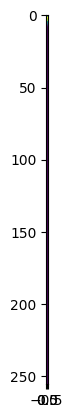

In [35]:
img_hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.imshow(img_hist)
plt.show()

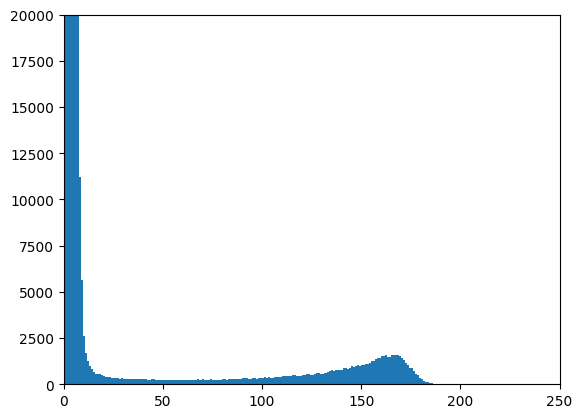

In [38]:
plt.hist(image.ravel(),256,[0,256])
plt.axis((0, 250, 0, 20000))
plt.show()

In [39]:
import numpy as np

In [46]:
laplacian = cv2.Laplacian(image,cv2.CV_64F)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


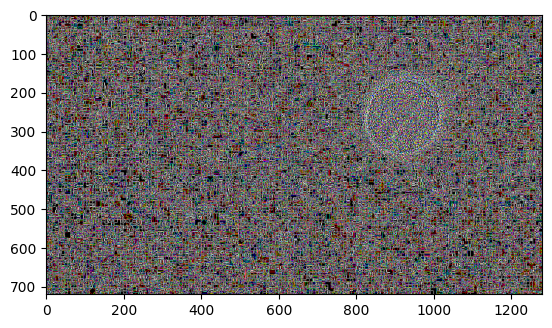

In [47]:
plt.imshow(laplacian); plt.show()

In [48]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [49]:
grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

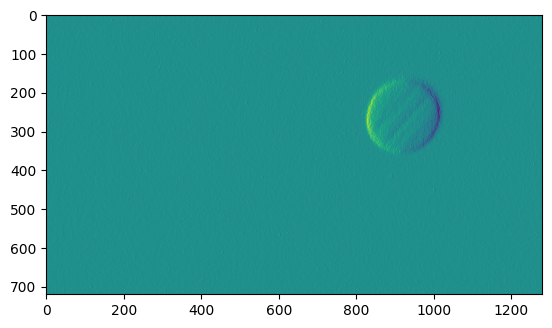

In [50]:
plt.imshow(grad_x); plt.show()

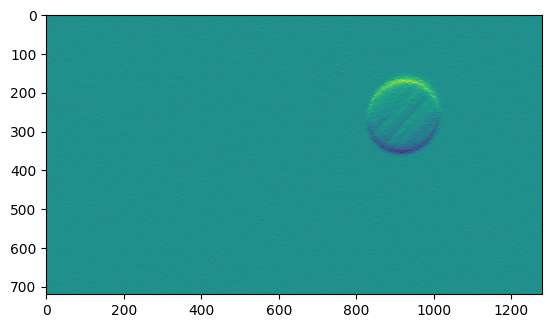

In [51]:
plt.imshow(grad_y); plt.show()

In [75]:
grad_x_max = grad_x.max(axis=0)

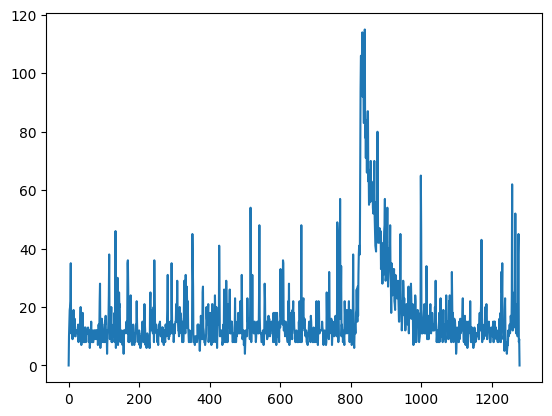

In [74]:
plt.plot(grad_x_max)
plt.show()

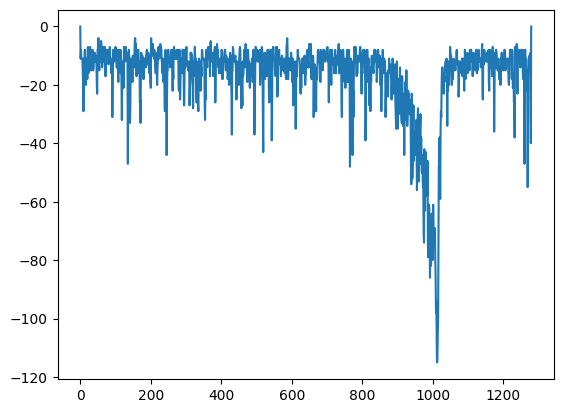

In [76]:
plt.plot(grad_x.min(axis=0))
plt.show()

In [78]:
sobel_x_grad = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_grad = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

In [123]:
x_grad_max = sobel_x_grad.max(axis=0)
x_grad_min = sobel_x_grad.min(axis=0)

y_grad_max = sobel_y_grad.max(axis=1)
y_grad_min = sobel_y_grad.min(axis=1)

In [124]:
xmin = np.where(x_grad_max == x_grad_max.max(axis=0))
xmax = np.where(x_grad_min == x_grad_min.min(axis=0))
ymin = np.where(y_grad_max == y_grad_max.max(axis=0))
ymax = np.where(y_grad_min == y_grad_min.min(axis=0))

In [125]:
padding = 10

In [126]:
xmin = int(xmin[0]) - padding
xmax = int(xmax[0]) + padding
ymin = int(ymin[0]) - padding
ymax = int(ymax[0]) + padding

In [127]:
xmin

830

In [128]:
cropped_image = image[ymin:ymax, xmin:xmax, :]

In [94]:
image.shape

(720, 1280, 3)

In [100]:
img = np.array(image)

In [102]:
img.shape

(720, 1280, 3)

In [104]:
img = cv2.imread(img_file)

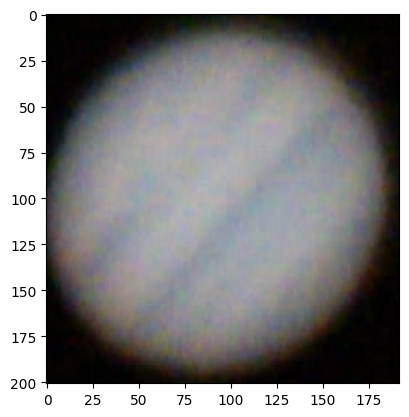

In [129]:
plt.imshow(cropped_image)
plt.show()

In [130]:
np.sum(sobel_x_grad, axis=0)

array([   0.,   55.,   94., ..., -104.,  -44.,    0.])

In [131]:
sum_x = np.sum(sobel_x_grad, axis=0)

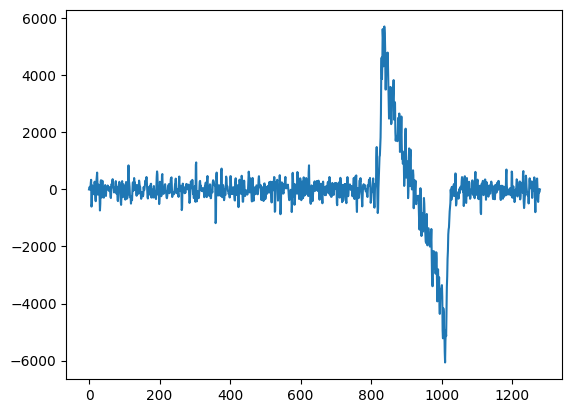

In [132]:
plt.plot(sum_x); plt.show()

In [135]:
sum_y = np.sum(sobel_y_grad, axis=1)

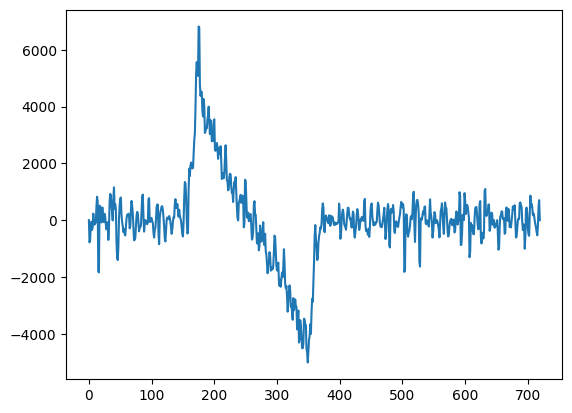

In [136]:
plt.plot(sum_y); plt.show()

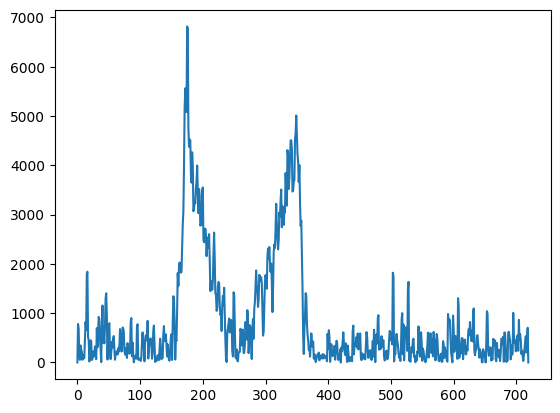

In [137]:
plt.plot(np.absolute(sum_y)); plt.show()

In [138]:
kernel = np.ones((3),np.float32)/3

In [139]:
smooth_y = np.convolve(kernel, sum_y)

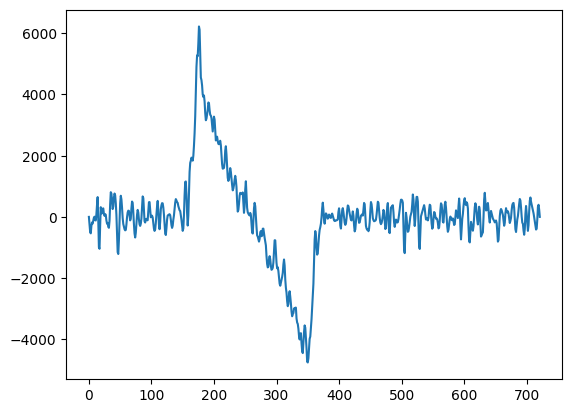

In [140]:
plt.plot(smooth_y); plt.show()

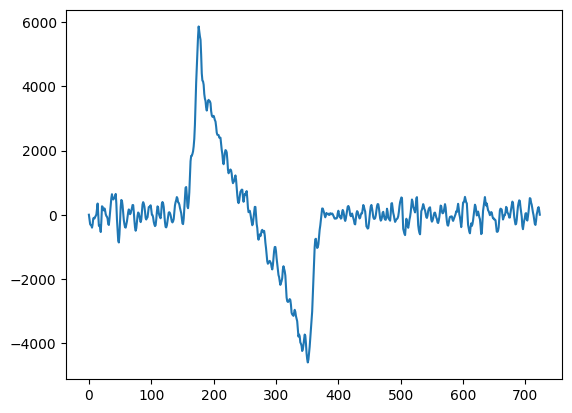

In [143]:
ksize = 5
kernel = np.ones((ksize),np.float32)/ksize
smooth_y = np.convolve(kernel, sum_y)
plt.plot(smooth_y); plt.show()

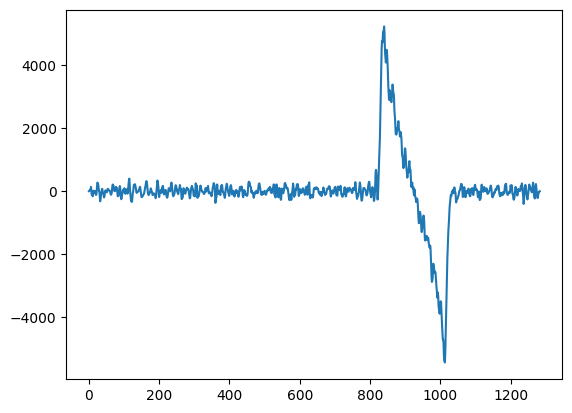

In [144]:
smooth_x = np.convolve(kernel, sum_x)
plt.plot(smooth_x); plt.show()

In [145]:
np.amax(smooth_x)

5237.600078046322

In [146]:
np.amin(smooth_x)

-5447.000081166625

In [147]:
half_max = np.amax(smooth_x)/2

In [148]:
half_max

2618.800039023161

In [172]:
xmin = 0
for i in range(1, len(sum_x)):
                if smooth_x[i] >= half_max:
                    xmin = i - padding
                    break

In [173]:
i

830

In [153]:
xmax = len(sum_x)

In [175]:
xmax

1024

In [155]:
half_min = np.amin(smooth_x)/2

In [156]:
half_min

-2723.5000405833125

In [162]:
for i in range(1, len(sum_x)):
                if smooth_x[-i] <= half_min:
                    xmax = len(sum_x) - i + padding
                    break

In [163]:
xmax

1024

In [164]:
i

266

In [165]:
smooth_x[-i]

-3057.6000455617905

In [166]:
smooth_x[-i+1]

-2528.600037679076

In [170]:
np.where(smooth_x == np.amax(smooth_x))[0]

array([840], dtype=int64)

In [171]:
smooth_x[840]

5237.600078046322

In [174]:
smooth_x[830]

2970.400044262409

In [176]:
xmin

820

In [177]:
half_min = np.amin(smooth_y)/2

In [178]:
half_min

-2302.900034315884

In [179]:
for i in range(1, len(sum_y)):
                if smooth_y[-i] <= half_min:
                    ymax = len(sum_y) - i + padding
                    break

In [180]:
ymax

365